In [1]:
"""
QUESTION:what does the data I am going to Feed into My NN going to look like?
    - Keep in Mind
        - Convlutions or no Convlutions
        - gonna normalize it between 0-1
        - Sparse Vs Dense rep. of the keypoint name
Another QUESTION: Is ORB entirly determanistic?

What will the data look like?
(x,y,name)
(0,0,name)
(0+x1,0+y1, name)
(x+x2,y+y2,name)
Note: might be cool to give the network some quality or type indicator
Where x1 and y1 are difference in pixel locations
        
"""

'\nQUESTION:what does the data I am going to Feed into My NN going to look like?\n    - Keep in Mind\n        - Convlutions or no Convlutions\n        - gonna normalize it between 0-1\n        - Sparse Vs Dense rep. of the keypoint name\nAnother QUESTION: Is ORB entirly determanistic?\n\nWhat will the data look like?\n(x,y,name)\n(0,0,name)\n(0+x1,0+y1, name)\n(x+x2,y+y2,name)\nNote: might be cool to give the network some quality or type indicator\nWhere x1 and y1 are difference in pixel locations\n        \n'

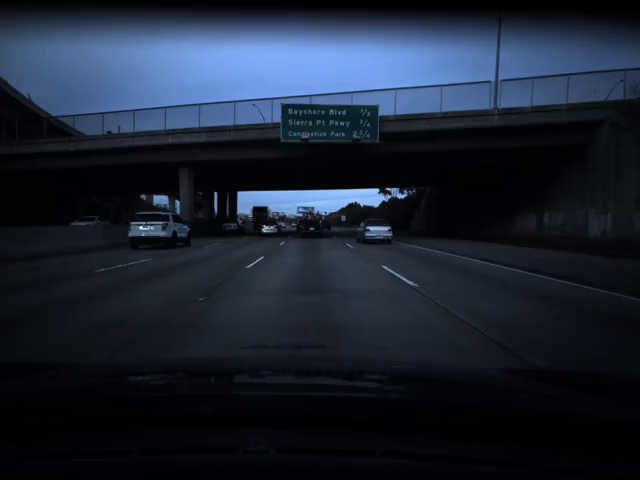

In [2]:
import cv2
import time
import PIL.Image
import numpy as np
import IPython.display

def showarray(a, fmt='png'):
    IPython.display.display(PIL.Image.fromarray(a))
    
c=cv2.VideoCapture("data/train.mp4")
frame0=cv2.cvtColor(c.read()[1],cv2.COLOR_BGR2RGB)
frame1=cv2.cvtColor(c.read()[1],cv2.COLOR_BGR2RGB)
frame2=cv2.cvtColor(c.read()[1],cv2.COLOR_BGR2RGB)

showarray(frame0)

In [3]:


orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

kp0=extractFeatures(frame0)
kp1=extractFeatures(frame1)
kp2=extractFeatures(frame2)



t0=time.time()

matches_0to1 = bf.match(kp0[1],kp1[1])
matches_1to2 = bf.match(kp1[1],kp2[1])

matches_0to1 = sorted(matches_0to1, key = lambda x:x.distance)
matches_1to2 = sorted(matches_1to2, key = lambda x:x.distance)

print(time.time()-t0)

img0,img1=None,None

img0 = cv2.drawMatches(frame0,kp0[0],frame1,kp1[0],matches_0to1[:20],outImg=img0)
img1 = cv2.drawMatches(frame1,kp1[0],frame2,kp2[0],matches_1to2[:20],outImg=img1)

showarray(img0)
showarray(img1)




NameError: name 'extractFeatures' is not defined

In [34]:
def get_orb_features_hardCoded(frame0,frame1,frame2,p_val=175):
    sk=0
    kp0=extractFeatures(frame0)
    kp1=extractFeatures(frame1)
    kp2=extractFeatures(frame2)

    matches_0to1 = bf.match(kp0[1],kp1[1])
    matches_1to2 = bf.match(kp1[1],kp2[1])

    matches_0to1 = sorted(matches_0to1, key = lambda x:x.distance)
    matches_1to2 = sorted(matches_1to2, key = lambda x:x.distance)


    fpts=[]
    pt_fs_0to1_0=[(int(kp0[0][i.queryIdx].pt[0]) ,int(kp0[0][i.queryIdx].pt[1])) for i in matches_0to1]
    pt_fs_0to1_1=[(int(kp1[0][i.trainIdx].pt[0]),int(kp1[0][i.trainIdx].pt[1])) for i in matches_0to1]

    pt_fs_1to2_1=[(int(kp1[0][i.queryIdx].pt[0]) ,int(kp1[0][i.queryIdx].pt[1])) for i in matches_1to2]
    pt_fs_1to2_2=[(int(kp2[0][i.trainIdx].pt[0]),int(kp2[0][i.trainIdx].pt[1])) for i in matches_1to2]
    f_idx_d=0
    for f_idx in range(min([len(pt_fs_0to1_0),len(pt_fs_1to2_1)])): #just loop till you reach the max number of features in the smallest match list
        pt0=pt_fs_0to1_0[f_idx]
        pt1=pt_fs_0to1_1[f_idx]

        try:
            idx_pt2=pt_fs_1to2_1.index(pt1)
        except ValueError: # means the point of the list move on
            sk+=1
            continue

        pt2=pt_fs_1to2_2[idx_pt2]
        f_idx_d+=1
        fpts+=[f_idx_d,f_idx_d,pt0[0],pt0[1],pt1[0],pt1[1],pt2[0],pt2[1]]
   
    n_fpts=f_idx_d
    print(n_fpts)
    if n_fpts >p_val:
        print("T")
        return fpts[:p_val-1] #this is wrong
    if n_fpts<p_val: 
        return fpts+np.array([[i,i,0,0,0,0,0,0] for i in range(n_fpts+1,n_fpts+((p_val)-n_fpts))]).flatten().tolist()
    return fpts
fpts=get_orb_features_hardCoded(frame0,frame1,frame2)
print(fpts)
#reshape for the correct time dimension
#np.array(fpts).reshape(175*4,2)

110
[1, 1, 325, 212, 325, 212, 325, 212, 2, 2, 498, 107, 507, 102, 517, 96, 3, 3, 362, 206, 362, 206, 362, 206, 4, 4, 154, 204, 153, 204, 152, 203, 5, 5, 141, 196, 140, 196, 142, 197, 6, 6, 174, 231, 175, 231, 176, 231, 7, 7, 154, 196, 153, 196, 151, 195, 8, 8, 302, 137, 302, 133, 301, 129, 9, 9, 133, 130, 194, 122, 190, 118, 10, 10, 318, 212, 318, 212, 318, 212, 11, 11, 266, 207, 266, 208, 266, 208, 12, 12, 168, 140, 164, 137, 158, 134, 13, 13, 532, 80, 544, 73, 430, 77, 14, 14, 390, 194, 391, 194, 392, 194, 15, 15, 367, 227, 366, 228, 366, 228, 16, 16, 344, 206, 344, 207, 345, 207, 17, 17, 377, 206, 378, 206, 379, 206, 18, 18, 368, 136, 371, 133, 373, 128, 19, 19, 272, 121, 270, 117, 269, 113, 20, 20, 336, 211, 336, 211, 336, 211, 21, 21, 531, 104, 542, 99, 554, 93, 22, 22, 238, 192, 237, 192, 235, 191, 23, 23, 390, 228, 389, 228, 390, 228, 24, 24, 301, 214, 302, 215, 301, 215, 25, 25, 366, 234, 366, 235, 366, 235, 26, 26, 253, 207, 253, 207, 253, 208, 27, 27, 298, 207, 298, 207, 298

In [36]:
len(fpts)

1392

In [43]:
171*7

1197

In [37]:
np.array(fpts).reshape(175,6)

ValueError: cannot reshape array of size 1392 into shape (175,6)

In [355]:
np.array(get_orb_features_hardCoded(frame0,frame1,frame2)).reshape(110*4,2)110*4*2

880

In [308]:
fpts=[[1,(0,0),(0,0),(0,0)],[2,(0,0),(0,0),(0,0)],[3,(0,0),(0,0),(0,0)]]
p_val=10
fpts+[[i,(0,0),(0,0),(0,0)] for i in range(len(fpts)+1,len(fpts)+((p_val)-len(fpts))) ]

[[1, (0, 0), (0, 0), (0, 0)],
 [2, (0, 0), (0, 0), (0, 0)],
 [3, (0, 0), (0, 0), (0, 0)],
 [4, (0, 0), (0, 0), (0, 0)],
 [5, (0, 0), (0, 0), (0, 0)],
 [6, (0, 0), (0, 0), (0, 0)],
 [7, (0, 0), (0, 0), (0, 0)],
 [8, (0, 0), (0, 0), (0, 0)],
 [9, (0, 0), (0, 0), (0, 0)]]

In [302]:
get_orb_features_hardCoded(frame0,frame1,frame2)

[[0, (325, 212), (325, 212), (325, 212)],
 [1, (498, 107), (507, 102), (517, 96)],
 [3, (362, 206), (362, 206), (362, 206)],
 [4, (154, 204), (153, 204), (152, 203)],
 [5, (141, 196), (140, 196), (142, 197)],
 [6, (174, 231), (175, 231), (176, 231)],
 [8, (154, 196), (153, 196), (151, 195)],
 [9, (302, 137), (302, 133), (301, 129)],
 [10, (133, 130), (194, 122), (190, 118)],
 [11, (318, 212), (318, 212), (318, 212)],
 [12, (266, 207), (266, 208), (266, 208)],
 [14, (168, 140), (164, 137), (158, 134)],
 [15, (532, 80), (544, 73), (430, 77)],
 [16, (390, 194), (391, 194), (392, 194)],
 [18, (367, 227), (366, 228), (366, 228)],
 [19, (344, 206), (344, 207), (345, 207)],
 [20, (377, 206), (378, 206), (379, 206)],
 [21, (368, 136), (371, 133), (373, 128)],
 [22, (272, 121), (270, 117), (269, 113)],
 [23, (336, 211), (336, 211), (336, 211)],
 [24, (531, 104), (542, 99), (554, 93)],
 [26, (238, 192), (237, 192), (235, 191)],
 [27, (390, 228), (389, 228), (390, 228)],
 [28, (301, 214), (302, 2

In [33]:
'''
refrence:https://gist.github.com/isker/11be0c50c4f78cad9549
trainIdx is the index of the feature in the second image given to the BF matcher
queryIdx is the index of the feature in the first image given to the BF matcher (NOPE NOT TRUE)

'''
help(matches[0])

Help on DMatch object:

class DMatch(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  distance
 |      distance
 |  
 |  imgIdx
 |      imgIdx
 |  
 |  queryIdx
 |      queryIdx
 |  
 |  trainIdx
 |      trainIdx



In [5]:
def extractFeatures(img):
  # Rightfuly Kindnaped from @geohots twitchslam 
  # detection
  pts = cv2.goodFeaturesToTrack(np.mean(img, axis=2).astype(np.uint8), 3000, qualityLevel=0.01, minDistance=7)
  kps = [cv2.KeyPoint(x=f[0][0], y=f[0][1], _size=20) for f in pts]
  kps, des = orb.compute(img, kps)
  return kps,des
  
    
def get_overlapping_orb_features(*imgs):
    
    kps=[extractFeatures(i) for i in imgs] # extractFeatures returns a tuple (kps,dst)
    matches=[(bf.match(kps[idx][1],kps[idx+1][1]),(idx,idx+1)) for idx in range(len(kps)-1)]
    max_f=max([len(i[0]) for i in kps]) # max number of features found in all frames
    pt_matrix=np.zeros(shape=(len(kps),max_f,2))
    
    for mat_idx in range(len(matches)):
        pt_matrix
        kp_id_0=matches[mat_idx][1][0] # the index of the first frame pair
        kp_id_1=matches[mat_idx][1][1]
        
        pt_matrix[kp_id_0]=padem(get_pt_list(matches[mat_idx][0],kps[kp_id_0][0]),max_f)
        pt_matrix[kp_id_1]=padem(get_pt_list(matches[mat_idx][0],kps[kp_id_1][0]),max_f)
    
    return pt_matrix

def padem(arr,esh):
    # Either I didn't undrestand np.pad or it's just not what i needed
    arr=np.array(arr)
    nz=np.zeros(shape=(esh-arr.shape[0],2))
    return np.vstack([arr,nz])
    
def get_pt_list(matches,kps):
    pt_list=[]
    for mat in matches:
        pt_list.append(
                [int(kps[mat.queryIdx].pt[0]) 
                 ,int(kps[mat.queryIdx].pt[1])])
    return pt_list
t=time.time()
pt_matrix=get_overlapping_orb_features(frame0,frame1,frame2)
time.time()-t

0.1043558120727539

In [243]:
pt_matrix.shape[1]

176

In [282]:
'''
Where did all the features go?
'''
f_idxes=[]
for f_idx in range(pt_matrix.shape[1]):
    x,y=pt_matrix[0][f_idx]
    #print(f_idx)
    r=np.where((pt_matrix[:,:,0] == x) & (pt_matrix[:,:,1]==y))
    if r[0].shape[0]==3 and (x!=0 and y!=0):
        f_idxes.append((list(zip(r[0], r[1]))))
f_idxes

[[(0, 7), (1, 4), (2, 6)],
 [(0, 12), (1, 13), (2, 15)],
 [(0, 16), (1, 12), (2, 11)],
 [(0, 32), (1, 31), (2, 39)],
 [(0, 35), (1, 41), (2, 44)],
 [(0, 38), (1, 33), (2, 36)],
 [(0, 68), (1, 57), (2, 74)],
 [(0, 94), (1, 105), (2, 96)]]

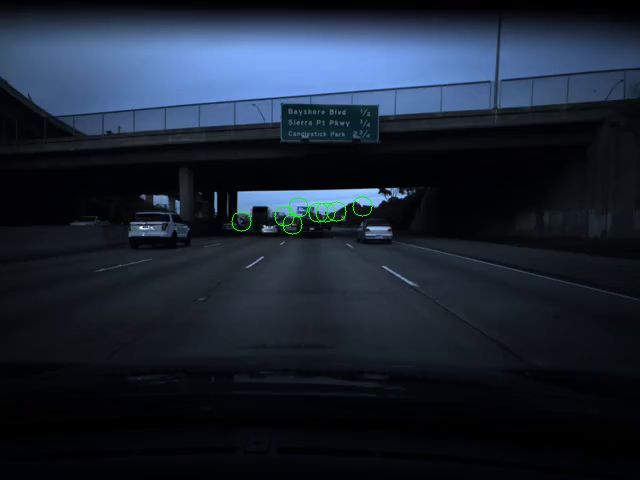

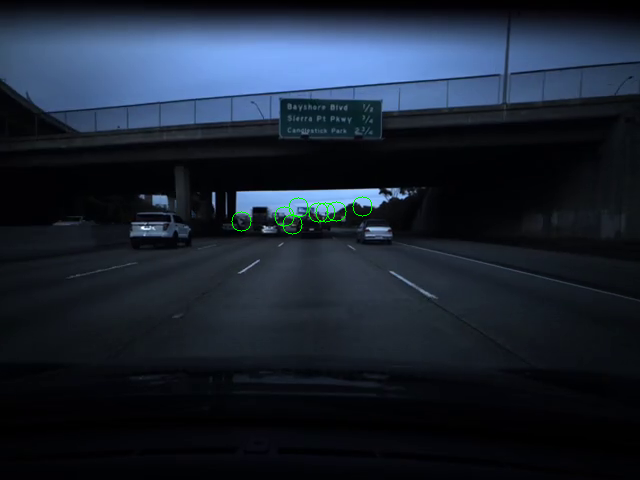

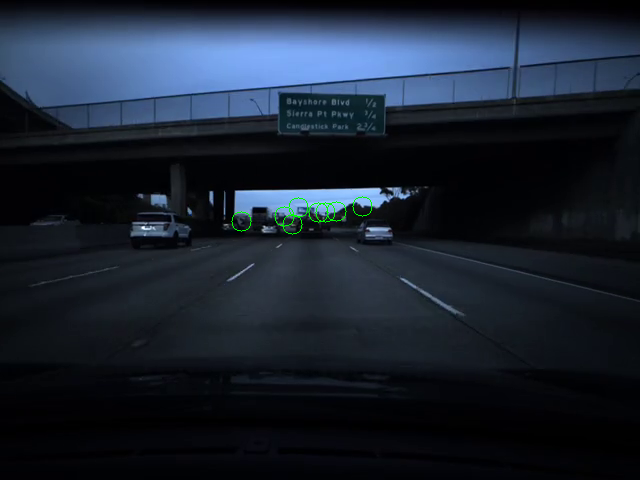

In [283]:

f0=frame0.copy()
f1=frame1.copy()
f2=frame2.copy()

def t(t):
    return tuple((int(t[0]),int(t[1])))

for i in f_idxes:
    f0=cv2.circle(f0,t(pt_matrix[i[0]]),10, (0,255,0))
    f1=cv2.circle(f1,t(pt_matrix[i[1]]),10, (0,255,0))
    f2=cv2.circle(f2,t(pt_matrix[i[2]]),10, (0,255,0))
    
showarray(f0)
showarray(f1)
showarray(f2)


In [270]:
int(tuple(pt_matrix[f_idxes[0][0]]))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

In [18]:
print((len([1,2,3])%2)*len([1,2,3])-1) #if kps are odd
print((len([1,2,3,4])%3)*len([1,2,3,4])-1)# if kps are even

2
3


In [19]:
m=[1,2]
k=[1,2,3]
k-1

2

[(325, 212), (498, 107), (183, 244), (362, 206), (154, 204)]
[(325, 212), (507, 102), (184, 244), (362, 206), (153, 204)]
[(318, 212), (323, 219), (310, 212), (325, 212), (266, 208)]
[(318, 212), (323, 219), (310, 212), (325, 212), (266, 208)]


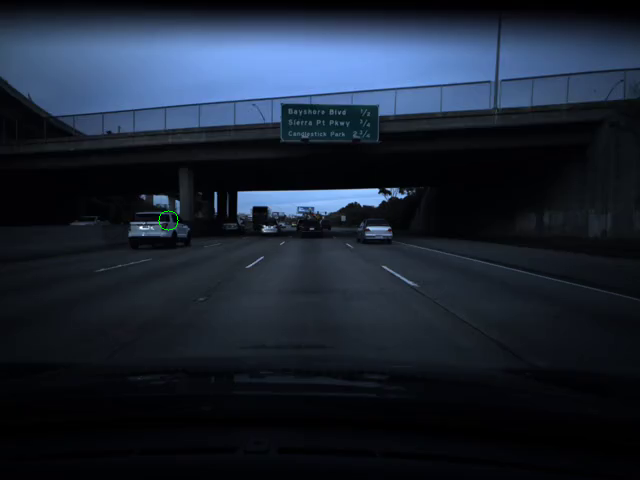

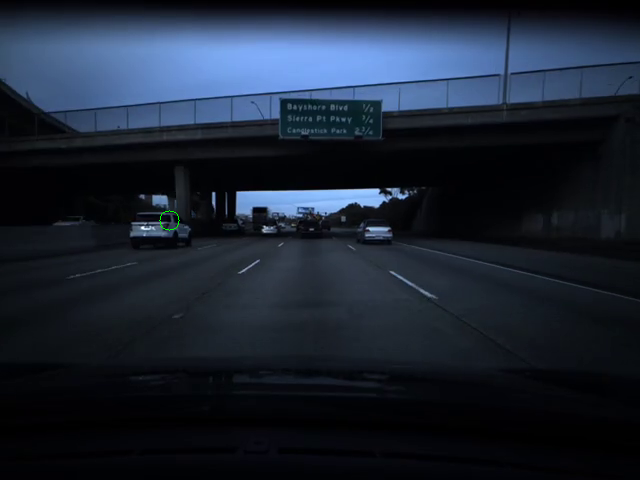

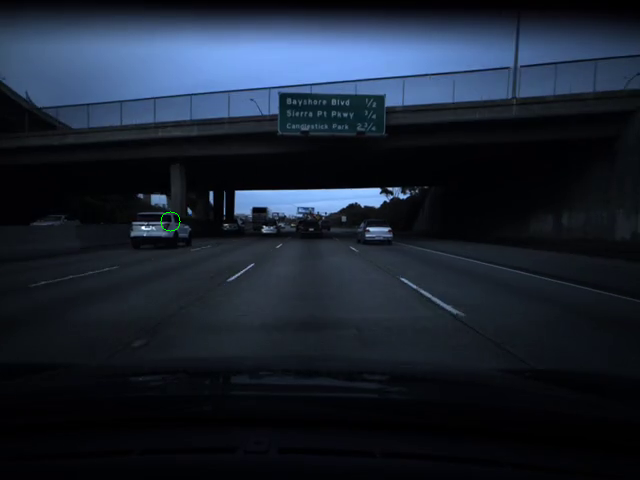

In [3]:
'''Tracking Features across BF Matchers via points'''
pt_fs_0to1_0=[(int(kp0[0][i.queryIdx].pt[0]) ,int(kp0[0][i.queryIdx].pt[1])) for i in matches_0to1]
pt_fs_0to1_1=[(int(kp1[0][i.trainIdx].pt[0]),int(kp1[0][i.trainIdx].pt[1])) for i in matches_0to1]

pt_fs_1to2_1=[(int(kp1[0][i.queryIdx].pt[0]) ,int(kp1[0][i.queryIdx].pt[1])) for i in matches_1to2]
pt_fs_1to2_2=[(int(kp2[0][i.trainIdx].pt[0]),int(kp2[0][i.trainIdx].pt[1])) for i in matches_1to2]

print(pt_fs_0to1_0[:5])
print(pt_fs_0to1_1[:5])

print(pt_fs_1to2_1[:5])
print(pt_fs_1to2_2[:5])

f0=frame0.copy()
f1=frame1.copy()
f2=frame2.copy()
f=100

pt0=pt_fs_0to1_0[f]
pt1=pt_fs_0to1_1[f]
idx_pt2=pt_fs_1to2_1.index(pt1)
pt2=pt_fs_1to2_2[idx_pt2]

showarray(cv2.circle(f0,pt0,10, (0,255,0)))
showarray(cv2.circle(f1,pt1,10, (0,255,0)))
showarray(cv2.circle(f2,pt2,10, (0,255,0)))

feature: 0 (325, 212) (325, 212) (325, 212)
feature: 1 (498, 107) (507, 102) (517, 96)
feature: 3 (362, 206) (362, 206) (362, 206)
feature: 4 (154, 204) (153, 204) (152, 203)
feature: 5 (141, 196) (140, 196) (142, 197)
feature: 6 (174, 231) (175, 231) (176, 231)
feature: 8 (154, 196) (153, 196) (151, 195)
feature: 9 (302, 137) (302, 133) (301, 129)
feature: 10 (133, 130) (194, 122) (190, 118)
feature: 11 (318, 212) (318, 212) (318, 212)
feature: 12 (266, 207) (266, 208) (266, 208)
feature: 14 (168, 140) (164, 137) (158, 134)
feature: 15 (532, 80) (544, 73) (430, 77)
feature: 16 (390, 194) (391, 194) (392, 194)
feature: 18 (367, 227) (366, 228) (366, 228)
feature: 19 (344, 206) (344, 207) (345, 207)
feature: 20 (377, 206) (378, 206) (379, 206)
feature: 21 (368, 136) (371, 133) (373, 128)
feature: 22 (272, 121) (270, 117) (269, 113)
feature: 23 (336, 211) (336, 211) (336, 211)
feature: 24 (531, 104) (542, 99) (554, 93)
feature: 26 (238, 192) (237, 192) (235, 191)
feature: 27 (390, 228) (

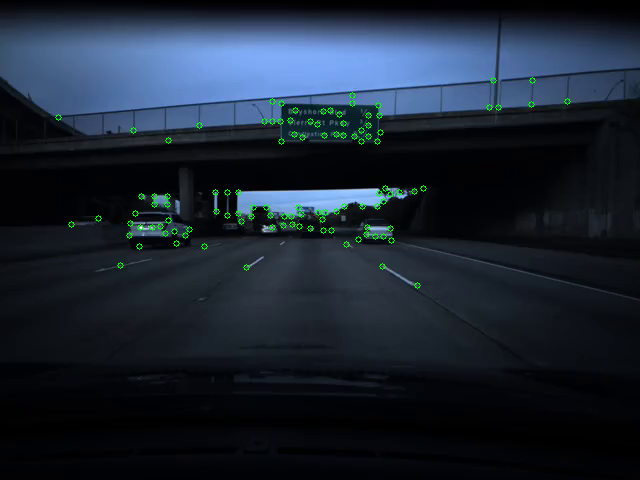

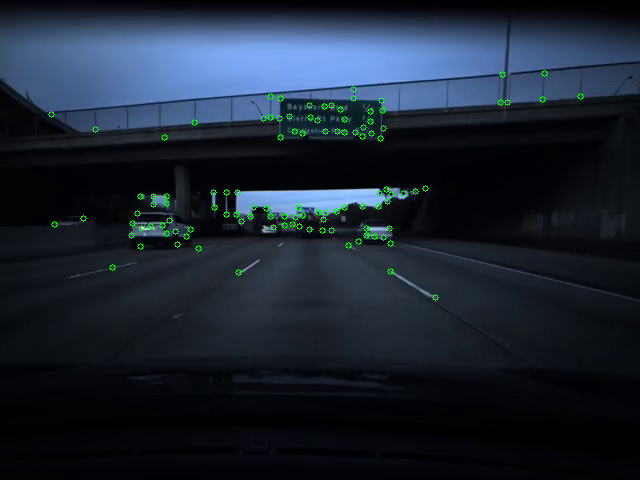

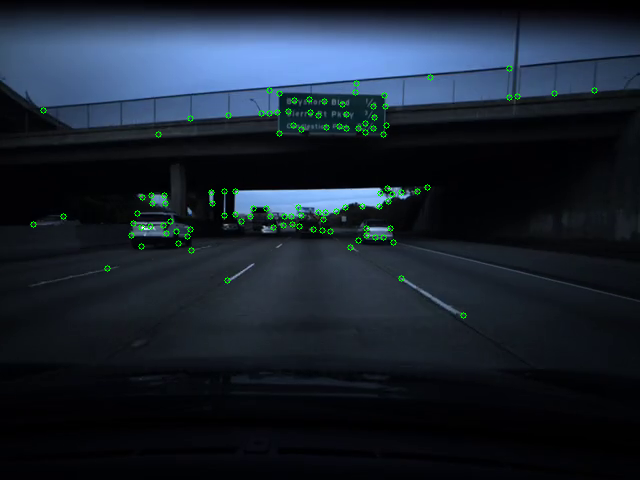

In [285]:
sk=0
f0=frame0.copy()
f1=frame1.copy()
f2=frame2.copy()


pt_fs_0to1_0=[(int(kp0[0][i.queryIdx].pt[0]) ,int(kp0[0][i.queryIdx].pt[1])) for i in matches_0to1]
pt_fs_0to1_1=[(int(kp1[0][i.trainIdx].pt[0]),int(kp1[0][i.trainIdx].pt[1])) for i in matches_0to1]

pt_fs_1to2_1=[(int(kp1[0][i.queryIdx].pt[0]) ,int(kp1[0][i.queryIdx].pt[1])) for i in matches_1to2]
pt_fs_1to2_2=[(int(kp2[0][i.trainIdx].pt[0]),int(kp2[0][i.trainIdx].pt[1])) for i in matches_1to2]

t0=time.time()
for f_idx in range(min([len(pt_fs_0to1_0),len(pt_fs_1to2_1)])): #just loop till you reach the max number of features in the smallest match list
    pt0=pt_fs_0to1_0[f_idx]
    pt1=pt_fs_0to1_1[f_idx]
    
    try:
        idx_pt2=pt_fs_1to2_1.index(pt1)
    except ValueError: # means the point of the list move on
        sk+=1
        continue
        
    pt2=pt_fs_1to2_2[idx_pt2]
    
    f0=cv2.circle(f0,pt0,3, (0,255,0))
    f1=cv2.circle(f1,pt1,3, (0,255,0))
    f2=cv2.circle(f2,pt2,3, (0,255,0))
    
    print("feature:",f_idx,pt0,pt1,pt2)
print(time.time()-t0)
print("Skipped:",sk,"Features")
showarray(f0)
showarray(f1)
showarray(f2)

In [ ]:
def get_orb_features_hardCoded(frame0,frame1,frame2):
    sk=0
f0=frame0.copy()
f1=frame1.copy()
f2=frame2.copy()


pt_fs_0to1_0=[(int(kp0[0][i.queryIdx].pt[0]) ,int(kp0[0][i.queryIdx].pt[1])) for i in matches_0to1]
pt_fs_0to1_1=[(int(kp1[0][i.trainIdx].pt[0]),int(kp1[0][i.trainIdx].pt[1])) for i in matches_0to1]

pt_fs_1to2_1=[(int(kp1[0][i.queryIdx].pt[0]) ,int(kp1[0][i.queryIdx].pt[1])) for i in matches_1to2]
pt_fs_1to2_2=[(int(kp2[0][i.trainIdx].pt[0]),int(kp2[0][i.trainIdx].pt[1])) for i in matches_1to2]

t0=time.time()
for f_idx in range(min([len(pt_fs_0to1_0),len(pt_fs_1to2_1)])): #just loop till you reach the max number of features in the smallest match list
    pt0=pt_fs_0to1_0[f_idx]
    pt1=pt_fs_0to1_1[f_idx]
    
    try:
        idx_pt2=pt_fs_1to2_1.index(pt1)
    except ValueError: # means the point of the list move on
        sk+=1
        continue
        
    pt2=pt_fs_1to2_2[idx_pt2]
    
    f0=cv2.circle(f0,pt0,3, (0,255,0))
    f1=cv2.circle(f1,pt1,3, (0,255,0))
    f2=cv2.circle(f2,pt2,3, (0,255,0))
    
    print("feature:",f_idx,pt0,pt1,pt2)
print(time.time()-t0)
print("Skipped:",sk,"Features")
showarray(f0)
showarray(f1)
showarray(f2)

In [81]:
def make_pt_f_lists(kp,matches):
    '''FIX ME I AM INCOMPLETEEEEEEE'''
    '''returns a list of the points in sequintal orders across a match so that similar features lineup'''
    return [(int(kp[i.queryIdx].pt[0]) ,int(kp[i.queryIdx].pt[1])) for i in matches]

#pt_fs_0to1_0=make_pt_f_lists(kp0[0],matches_0to1)
#pt_fs_0to1_1=make_pt_f_lists(kp1[0],matches_0to1)

#pt_fs_1to2_1=make_pt_f_lists(kp1[0],matches_1to2)
#pt_fs_1to2_2=make_pt_f_lists(kp2[0],matches_1to2)
